In [1]:
import pandas as pd
import numpy as np
import scipy as scipy
import math as math
import datetime
import re
import math
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Use statsmodels package for regression analysis 
import statsmodels.formula.api as smf

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

# Import the function to calculate RMSE
from statsmodels.tools.eval_measures import rmse

import sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
# loading the 2022 data

path = 'Data/parking-tickets-2022/'

df = pd.read_csv(path+"Parking_Tags_Data_2022.000.csv", converters={'time_of_infraction': str})
df1 = pd.read_csv(path+"Parking_Tags_Data_2022.001.csv", converters={'time_of_infraction': str})
df2 = pd.read_csv(path+"Parking_Tags_Data_2022.002.csv", converters={'time_of_infraction': str})
df3 = pd.read_csv(path+"Parking_Tags_Data_2022.003.csv", converters={'time_of_infraction': str})
df4 = pd.read_csv(path+"Parking_Tags_Data_2022.004.csv", converters={'time_of_infraction': str})
df5 = pd.read_csv(path+"Parking_Tags_Data_2022.005.csv", converters={'time_of_infraction': str})
df6 = pd.read_csv(path+"Parking_Tags_Data_2022.006.csv", converters={'time_of_infraction': str})
df7 = pd.read_csv(path+"Parking_Tags_Data_2022.007.csv", converters={'time_of_infraction': str})

In [3]:
# append 2022 files to one dataframe

df2022 = pd.concat([df, df1, df2, df3, df4, df5, df6, df7], ignore_index=True)
df2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821887 entries, 0 to 1821886
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   tag_number_masked       object
 1   date_of_infraction      int64 
 2   infraction_code         int64 
 3   infraction_description  object
 4   set_fine_amount         int64 
 5   time_of_infraction      object
 6   location1               object
 7   location2               object
 8   location3               object
 9   location4               object
 10  province                object
dtypes: int64(3), object(8)
memory usage: 152.9+ MB


In [4]:
# loading the 2021 data
path = 'Data/parking-tickets-2021/'

df = pd.read_csv(path+"Parking_Tags_Data_2021.000.csv", converters={'time_of_infraction': str})
df1 = pd.read_csv(path+"Parking_Tags_Data_2021.001.csv", converters={'time_of_infraction': str})
df2 = pd.read_csv(path+"Parking_Tags_Data_2021.002.csv", converters={'time_of_infraction': str})
df3 = pd.read_csv(path+"Parking_Tags_Data_2021.003.csv", converters={'time_of_infraction': str})
df4 = pd.read_csv(path+"Parking_Tags_Data_2021.004.csv", converters={'time_of_infraction': str})
df5 = pd.read_csv(path+"Parking_Tags_Data_2021.005.csv", converters={'time_of_infraction': str})
df6 = pd.read_csv(path+"Parking_Tags_Data_2021.006.csv", converters={'time_of_infraction': str})
df7 = pd.read_csv(path+"Parking_Tags_Data_2021.007.csv", converters={'time_of_infraction': str})
df8 = pd.read_csv(path+"Parking_Tags_Data_2021.008.csv", converters={'time_of_infraction': str})
df9 = pd.read_csv(path+"Parking_Tags_Data_2021.009.csv", converters={'time_of_infraction': str})
df10 = pd.read_csv(path+"Parking_Tags_Data_2021.010.csv", converters={'time_of_infraction': str})
df11 = pd.read_csv(path+"Parking_Tags_Data_2021.011.csv", converters={'time_of_infraction': str})
df12 = pd.read_csv(path+"Parking_Tags_Data_2021.012.csv", converters={'time_of_infraction': str})
df13 = pd.read_csv(path+"Parking_Tags_Data_2021.013.csv", converters={'time_of_infraction': str})
df14 = pd.read_csv(path+"Parking_Tags_Data_2021.014.csv", converters={'time_of_infraction': str})

In [5]:
# append 2021 files to one dataframe

df2021 = pd.concat([df, df1, df2, df3, df4, df5, df6, df7,df8, df9, df10, df11, df12, df13, df14], ignore_index=True)
df2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481709 entries, 0 to 1481708
Data columns (total 11 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   tag_number_masked       1481709 non-null  object
 1   date_of_infraction      1481709 non-null  int64 
 2   infraction_code         1481709 non-null  int64 
 3   infraction_description  1481709 non-null  object
 4   set_fine_amount         1481709 non-null  int64 
 5   time_of_infraction      1481709 non-null  object
 6   location1               1266684 non-null  object
 7   location2               1481627 non-null  object
 8   location3               126160 non-null   object
 9   location4               126286 non-null   object
 10  province                1481709 non-null  object
dtypes: int64(3), object(8)
memory usage: 124.4+ MB


In [6]:
df = pd.concat([df2021,df2022], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303596 entries, 0 to 3303595
Data columns (total 11 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   tag_number_masked       object
 1   date_of_infraction      int64 
 2   infraction_code         int64 
 3   infraction_description  object
 4   set_fine_amount         int64 
 5   time_of_infraction      object
 6   location1               object
 7   location2               object
 8   location3               object
 9   location4               object
 10  province                object
dtypes: int64(3), object(8)
memory usage: 277.2+ MB


In [7]:
# display all columns

pd.set_option('display.max_columns', None)
df.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***92621,20210101,3,PARK ON PRIVATE PROPERTY,30,0013,AT,1440 LAWRENCE AVE W,NaN,NaN,ON
1,***42843,20210101,3,PARK ON PRIVATE PROPERTY,30,0026,NaN,33 GABIAN WAY,NaN,NaN,ON
2,***47171,20210101,3,PARK ON PRIVATE PROPERTY,30,0029,NaN,16 WILLIAM KITCHEN,NaN,NaN,ON
3,***42844,20210101,3,PARK ON PRIVATE PROPERTY,30,0029,NaN,33 GABIAN WAY,NaN,NaN,ON
4,***42848,20210101,3,PARK ON PRIVATE PROPERTY,30,0040,NaN,33 GABIAN WAY,NaN,NaN,ON


In [8]:
df_con = df

New columns are engineered for meaningful analysis

In [9]:
# convert infraction date to datetime format
df["date_of_infraction"] = pd.to_datetime(df["date_of_infraction"], format='%Y%m%d')

# new columns to hold year, month, day, and day of week
df['year'], df['month'], df['day'] = df['date_of_infraction'].dt.year, df['date_of_infraction'].dt.month, df['date_of_infraction'].dt.day

**day of the week name**

In [10]:
df['day_of_week_name'] = df["date_of_infraction"].dt.day_name()
df['day_of_week_name']

0            Friday
1            Friday
2            Friday
3            Friday
4            Friday
             ...   
3303591    Saturday
3303592    Saturday
3303593    Saturday
3303594    Saturday
3303595    Saturday
Name: day_of_week_name, Length: 3303596, dtype: object

**day of the week numerical value** 
(to process in the model)

- 0 = Monday
- 1 = Tuesday
- 2 = Wednesday
- 3 = Thursday
- 4 = Friday
- 5 = Saturday
- 6 = Sunday

In [11]:
df['day_of_week'] = df['date_of_infraction'].dt.weekday
df['day_of_week']

0          4
1          4
2          4
3          4
4          4
          ..
3303591    5
3303592    5
3303593    5
3303594    5
3303595    5
Name: day_of_week, Length: 3303596, dtype: int64

In [12]:
df.sample(20)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,day_of_week_name,day_of_week
1337074,***21305,2021-11-30,207,PARK MACHINE-REQD FEE NOT PAID,30,1809,NR,599 COLLEGE ST,NaN,NaN,ON,2021,11,30,Tuesday,1
2777377,***82987,2022-09-16,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1258,NR,64 ARMSTRONG AVE,NaN,NaN,ON,2022,9,16,Friday,4
2670353,***29922,2022-08-26,207,PARK MACHINE-REQD FEE NOT PAID,30,1713,NR,238 CARLTON ST,NaN,NaN,ON,2022,8,26,Friday,4
2698338,***67064,2022-09-01,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,0940,NR,1230 KING ST W,NaN,NaN,ON,2022,9,1,Thursday,3
142751,***09621,2021-03-10,384,STOP VEH OTR THN BCYCL-BYCL LN,150,1311,NR,525 ADELAIDE ST W,NaN,NaN,ON,2021,3,10,Wednesday,2
883634,***36742,2021-09-12,9,STOP-SIGNED HWY-PROHIBIT TM/DY,100,1359,NR,146 ROWNTREE MILL RD,NaN,NaN,ON,2021,9,12,Sunday,6
1455596,***45144,2021-12-22,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,1608,NR,23 FAIRSIDE AVE,NaN,NaN,ON,2021,12,22,Wednesday,2
2965507,***33327,2022-10-21,207,PARK MACHINE-REQD FEE NOT PAID,30,1352,NR,801 KING ST W,NaN,NaN,ON,2022,10,21,Friday,4
2709029,***13475,2022-09-03,336,PARK-FAIL TO DISPLAY PERMIT,30,0745,NR,6 PAGE ST,NaN,NaN,ON,2022,9,3,Saturday,5
1981617,***44766,2022-04-22,29,PARK PROHIBITED TIME NO PERMIT,30,0409,NR,135 PLAINS RD,NaN,NaN,ON,2022,4,22,Friday,4


**remove empty value of time_of_infraction**

In [13]:
df[df['time_of_infraction'] == '']

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,day_of_week_name,day_of_week
1901,***92218,2021-01-02,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,,OPP,129 ULSTER ST,NaN,NaN,ON,2021,1,2,Saturday,5
1902,***30296,2021-01-02,3,PARK ON PRIVATE PROPERTY,30,,NaN,2264 LAKE SHORE BLVD,NaN,NaN,ON,2021,1,2,Saturday,5
3159,***00433,2021-01-03,3,PARK ON PRIVATE PROPERTY,30,,NaN,415 WILLOWDALE AVE,NaN,NaN,ON,2021,1,3,Sunday,6
3160,***30364,2021-01-03,3,PARK ON PRIVATE PROPERTY,30,,NaN,1137 MARKHAM RD,NaN,NaN,ON,2021,1,3,Sunday,6
7167,***00979,2021-01-05,3,PARK ON PRIVATE PROPERTY,30,,NaN,15 FIELD SPARROWAY,NaN,NaN,ON,2021,1,5,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281475,***10085,2022-12-23,403,STOP-SIGNED HIGHWAY-RUSH HOUR,150,,NR,2455 YONGE ST,NaN,NaN,ON,2022,12,23,Friday,4
3284511,***62181,2022-12-26,5,PARK-SIGNED HWY-PROHIBIT DY/TM,50,,NR,199 YONGE ST,NaN,NaN,ON,2022,12,26,Monday,0
3284512,***62182,2022-12-26,9,STOP-SIGNED HWY-PROHIBIT TM/DY,100,,NR,220 YONGE ST,NaN,NaN,ON,2022,12,26,Monday,0
3286724,***57829,2022-12-27,3,PARK ON PRIVATE PROPERTY,30,,NaN,33 SHORE BREEZE DR,NaN,NaN,ON,2022,12,27,Tuesday,1


In [14]:
len(df[df['time_of_infraction'] == ''])

1864

In [15]:
df.drop(df[df['time_of_infraction'] == ''].index, inplace=True)

In [16]:
len(df[df['time_of_infraction'] == ''])

0

In [17]:
df[df['time_of_infraction'].str.contains('97')]

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,day_of_week_name,day_of_week
2314064,***19297,2022-06-21,312,PARKING MACH-NOT USED/NO FEE,75,1197,NaN,10 KINGSDALE AVE,NaN,NaN,ON,2022,6,21,Tuesday,1


**extract hour and min**
(but need to be in numerical value (not string) to be able to process it in the model)

In [18]:
# convert infraction time to separate hour and minute columns
df['time_hour'],df['time_min']  = df['time_of_infraction'].str[:2], df['time_of_infraction'].str[2:]

In [19]:
#df['time_of_infraction'] = df['time_of_infraction'].fillna(pd.Timestamp('00:00:00').time())

In [20]:
print(df['time_hour'].unique())

['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24' '28']


In [21]:
len(df[df['time_hour'] == '28'])

1

**remove '28' value since it does not correspond to regular hour**

In [22]:
df.drop(df[df['time_hour'] == '28'].index, inplace=True)
print(df['time_hour'].unique())

['00' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13'
 '14' '15' '16' '17' '18' '19' '20' '21' '22' '23' '24']


In [23]:
print(df['time_min'].unique())

['13' '26' '29' '40' '45' '48' '50' '53' '55' '56' '05' '07' '08' '09'
 '10' '11' '12' '14' '16' '17' '19' '20' '21' '27' '28' '31' '32' '38'
 '43' '44' '46' '51' '52' '00' '01' '02' '03' '04' '06' '15' '18' '22'
 '23' '24' '25' '30' '33' '34' '35' '36' '39' '41' '42' '47' '49' '54'
 '57' '58' '59' '37' '90' '97']


**remove '90' and '97' valuea since it does not correspond to regular min**

In [24]:
len(df[df['time_min'] == '90'])

1

In [25]:
len(df[df['time_min'] == '97'])

1

In [26]:
df.drop(df[df['time_min'] == '90'].index, inplace=True)
df.drop(df[df['time_min'] == '97'].index, inplace=True)
print(df['time_min'].unique())

['13' '26' '29' '40' '45' '48' '50' '53' '55' '56' '05' '07' '08' '09'
 '10' '11' '12' '14' '16' '17' '19' '20' '21' '27' '28' '31' '32' '38'
 '43' '44' '46' '51' '52' '00' '01' '02' '03' '04' '06' '15' '18' '22'
 '23' '24' '25' '30' '33' '34' '35' '36' '39' '41' '42' '47' '49' '54'
 '57' '58' '59' '37']


**change to numerical value**

In [27]:
df[['time_hour', 'time_min']] = df[['time_hour', 'time_min']].astype(int)

In [28]:
print(df['time_hour'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


In [29]:
print(df['time_min'].unique())

[13 26 29 40 45 48 50 53 55 56  5  7  8  9 10 11 12 14 16 17 19 20 21 27
 28 31 32 38 43 44 46 51 52  0  1  2  3  4  6 15 18 22 23 24 25 30 33 34
 35 36 39 41 42 47 49 54 57 58 59 37]


In [30]:
df['time_of_infraction'].dtypes

dtype('O')

In [31]:
df.nunique()

tag_number_masked         100004
date_of_infraction           730
infraction_code              174
infraction_description       190
set_fine_amount               17
time_of_infraction          1441
location1                    233
location2                 244423
location3                     80
location4                   3931
province                      68
year                           2
month                         12
day                           31
day_of_week_name               7
day_of_week                    7
time_hour                     25
time_min                      60
dtype: int64

In [32]:
df.isnull().sum()

# The only attributes that have null values are the location related attributes
# We will do some analysis to ensure that it is reasonable to drop any records/attributes

tag_number_masked               0
date_of_infraction              0
infraction_code                 0
infraction_description          0
set_fine_amount                 0
time_of_infraction              0
location1                  428805
location2                     161
location3                 3023389
location4                 3023145
province                        0
year                            0
month                           0
day                             0
day_of_week_name                0
day_of_week                     0
time_hour                       0
time_min                        0
dtype: int64

**Location Analysis**

In [33]:
location = df[['location1','location2','location3','location4']]

# We expect that  location2 is most useful since this field is defined to be the street address where the infraction occurred
# However, there are some records that do not have location2 so group 1 will be used to check these records
grp1 = location.loc[location['location2'].notnull() == False]

# We also want to validate that location2 values upholds its definition, i.e. the value should start with a number (digit).
# We will check the records that do not beging with a number.
grp2 = location.loc[location['location2'].str[0].str.isdigit() == False]

# 92% of location 3 & 4 are null from the entire consolidated dataset
# So, group 3 will be used to check if these columns hold meaningful values
grp3 = location.loc[(location['location3'].notnull() == True) | (location['location4'].notnull() == True)]

In [34]:
print(grp1.shape)
print(grp1[(grp1['location1'].notnull() == True) | (grp1['location3'].notnull() == True) | (grp1['location4'].notnull() == True)].shape)
grp1[(grp1['location1'].notnull() == True) | (grp1['location3'].notnull() == True) | (grp1['location4'].notnull() == True)]

# There are a total of 192 records that do not have values in location2 column. Out of them, there are 31 records that have values in one or more of the other location columns.
# However, they are deemed meaningless since the other location attributes also do not provide further location information.

# Conclusion: We can safely drop these 192 records that do not have any location information.

(161, 4)
(24, 4)


,location1,location2,location3,location4
9465,AT,NaN,NaN,NaN
14987,AT,NaN,NaN,NaN
66955,AT,NaN,NaN,NaN
206898,NR,NaN,NaN,NaN
348687,AT,NaN,NaN,NaN
366129,AT,NaN,NaN,NaN
366209,AT,NaN,NaN,NaN
366213,AT,NaN,NaN,NaN
1279641,AT,NaN,NaN,NaN
1502271,AT,NaN,NaN,NaN


In [35]:
print(grp2.shape)
grp2.sample(10)

# There are 279134 records where location2 does not start with a digit.
# Sample of the data shows that location3 and location4 are used in conjunction with street in location2 to pinpoint an intersection.

# Conclusion: Analysis of location3 and location4 is needed.

(279087, 4)


,location1,location2,location3,location4
1976242,E/S,VICTORIA ST,S/O,LOMBARD ST
1927192,E/S,AUGUSTA AVE,N/O,QUEEN ST W
2487975,W/S,BRIN DR,N/O,DUNDAS ST W
2385098,N/S,EDWARD ST,W/O,YONGE ST
188584,E/S,BEECROFT RD,S/O,SHEPPARD AVE W
783961,S/S,LENNOX ST,E/O,MARKHAM ST
1396545,W/S,SHAW ST,N/O,KING ST W
307452,N/S,LABATT AVE,E/O,DEFRIES ST
385814,S/S,BLOOR ST E,E/O,YONGE ST
407438,E/S,EAGLESTONE RD,N/O,BAY MILLS BLVD


In [36]:
grp3.loc[grp3['location2'].str[0].str.isdigit() == True]

# for records that have location3/location4 values, there are some records that have street addresses provided in location2. This means that even if location3/location4 are not used, location data is still retained

,location1,location2,location3,location4
10591,NaN,3030 BIRCHMOUNT RD,NaN,SCARBOROUGH
19278,NaN,50 WILSON HTS BLVD,NaN,4
40709,NR,170 BAYVIEW AVE,NaN,OUT INCOMING TRAFFIC
61891,NaN,36 DRIFTWOOD AVE,NaN,`
62665,NaN,27 PITTSBORO DRIVE,NaN,"ETOBICOKE, ON"
...,...,...,...,...
2855502,NaN,100 GRAYDON HALL,NaN,NORTH YORK
2855514,NaN,100 GRAYDON HALL,NaN,NORTH YORK
3041008,ACROSS,76 GRENVILLE ST,NaN,TORONTO
3270054,NR,25 YORK ST,ON,BREMNER BLVD


In [37]:
grp3.loc[grp3['location2'].str[0].str.isdigit() == False]

# When only a street is provided, location3 and location4 are used as observed in grp2. 
# Conclusion: location3 and location4 are only used optionally when no street address is provided in location2. For the purpose of our project, it is also safe to drop the records that do not have a street number.

,location1,location2,location3,location4
108,N/S,MCADAM AVE,W/O,DUFFERIN ST
111,N/S,MCADAM AVE,W/O,DUFFERIN ST
119,E/S,DANESBURY AVE,N/O,GLENCAIRN AVE
158,W/S,IONIC LANE,S/O,WINSTON PARK BLVD
358,E/S,ARENA ST,N/O,TRETHEWEY DR
...,...,...,...,...
3303588,S/S,DUNDAS ST W,W/O,YONGE ST
3303590,S/S,DUNDAS ST W,W/O,YONGE ST
3303591,N/S,DUNDAS ST W,W/O,YONGE ST
3303592,W/S,FREELAND ST,S/O,LAKESHORE RD E


In [38]:
grp3.loc[grp3['location2'].str.isdigit() == True]

# There is a record that has an error, with the street address split between location2 and location3. For the purpose of our project, we will also drop this record.

,location1,location2,location3,location4
1110181,OPP,19,HANNA AV,NaN


In [39]:
df = df[df['location2'].notnull() == True] # conclusion from grp1 analysis
df = df[df['location2'].str[0].str.isdigit() == True] # conclusion from grp2 and grp3 analysis
df = df[df['location2'].str.isdigit() == False] # exclusion of error record

**Observations to note**

In [40]:
# Noticed that some infractions of fine amount of $0, so we need to check which infraction codes have such infractions
distinct_fines = df.groupby(['infraction_code', 'infraction_description', 'set_fine_amount'], as_index = False).size()
warning_codes = distinct_fines[distinct_fines['set_fine_amount'] == 0]['infraction_code']

distinct_fines[distinct_fines['set_fine_amount'] == 0]

# We may have to make the assumption that fine = $0 means a warning?

,infraction_code,infraction_description,set_fine_amount,size
1,1,PARK-FAIL TO DEPOSIT FEE METER,0,1
3,3,PARK ON PRIV PROP NO CONSENT,0,6
5,3,PARK PRIVATE PROP NO CONSENT,0,6
6,4,PARK MUN PROP NO CONSENT,0,1
7,4,PARK ON MUN PROP NO CONSENT,0,66
9,5,PARK HWY PRO TIMES/DAYS,0,1
10,5,PARK HWY PROHIBITED TIMES/DAYS,0,2
12,6,PARK SIGNED HWY EXCESS OF TIME,0,1
14,7,PARK IN DESIGNATED FIRE ROUTE,0,1
15,7,PARK/LEAVE-FIRE ROUTE,0,2


#### **Drop irrelevant features**

In [41]:
# drop tag_number, infraction desc, location1, location3, location4, province

#df=df.drop(df[['tag_number_masked','infraction_description','location1','province','location3','location4']],axis = 1)
#df.isnull().sum()

In [42]:
df.sample(20)

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,year,month,day,day_of_week_name,day_of_week,time_hour,time_min
2153859,***87104,2022-05-23,3,PARK ON PRIVATE PROPERTY,30,1650,AT,380 DIXON RD,NaN,NaN,ON,2022,5,23,Monday,0,16,50
1321254,***93004,2021-11-27,3,PARK ON PRIVATE PROPERTY,30,1459,NaN,17 ST ANDREW ST,NaN,NaN,ON,2021,11,27,Saturday,5,14,59
2819252,***45248,2022-09-24,29,PARK PROHIBITED TIME NO PERMIT,30,0357,NR,488 SOUDAN AVE,NaN,NaN,ON,2022,9,24,Saturday,5,3,57
24934,***05136,2021-01-14,3,PARK ON PRIVATE PROPERTY,30,2048,AT,1154 WILSON AVE,NaN,NaN,ON,2021,1,14,Thursday,3,20,48
674179,***73438,2021-08-04,207,PARK MACHINE-REQD FEE NOT PAID,30,1114,NR,522 UNIVERSITY AVE,NaN,NaN,ON,2021,8,4,Wednesday,2,11,14
433272,***58178,2021-06-20,3,PARK ON PRIVATE PROPERTY,30,2058,NaN,150 DAN LECKIE WAY,NaN,NaN,ON,2021,6,20,Sunday,6,20,58
2970102,***37845,2022-10-22,4,PARK ON MUNICIPAL PROPERTY,30,0948,AT,45 ABELL ST,NaN,NaN,ON,2022,10,22,Saturday,5,9,48
2873368,***39759,2022-10-04,312,PARKING MACH-NOT USED/NO FEE,75,1017,AT,1501 YONGE STREET,NaN,NaN,ON,2022,10,4,Tuesday,1,10,17
2419299,***87652,2022-07-11,2,PARK - LONGER THAN 3 HOURS,30,1132,NR,10 MARLINGTON CRES,NaN,NaN,QC,2022,7,11,Monday,0,11,32
1622074,***31409,2022-02-08,207,PARK MACHINE-REQD FEE NOT PAID,30,1645,OPP,38 BIRCHVIEW BLVD,NaN,NaN,ON,2022,2,8,Tuesday,1,16,45


# **Clustering Model #1**

With clustering, we're trying to group together parking violations with similar characteristics based on the features that were selected (infraction code, year, month, day, day of the week, set fine amount, time hour, and time minute).

---

1. **Numerical discrete**:

  - infraction_code
  - year
  - month
  - day
  - day_of_week

2. **Numerical continuous**

  - set_fine_amount	
  - time_hour	
  - time_min

3. **Categorical discrete**

  - province

4. **Categorical String (not useful if not converted into numerical)**

  - tag_number_masked
  - infraction_description
  - location2



In [43]:
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **Data Preparation**

In [44]:
# Data separation
num_discrete = ['infraction_code', 'year', 'month', 'day', 'day_of_week']
num_continuous = ['set_fine_amount', 'time_hour', 'time_min']
#X = df[num_discrete + num_continuous]

# 50% of the data
df_sample_half = df.sample(frac=0.5, random_state=42)
X_half = df_sample_half[num_discrete + num_continuous]
print(len(df_sample_half))

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_half)

1511230


In [45]:
# Smaller random sample to find best K
sample_df = df.sample(frac=0.02, random_state=42)
X_sample = sample_df[num_discrete + num_continuous]
print(len(sample_df))

scaler = StandardScaler()
X_sample_norm = scaler.fit_transform(X_sample)

60449


# **Kmeans Model Preparation**

/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/a

Optimal K: K=5


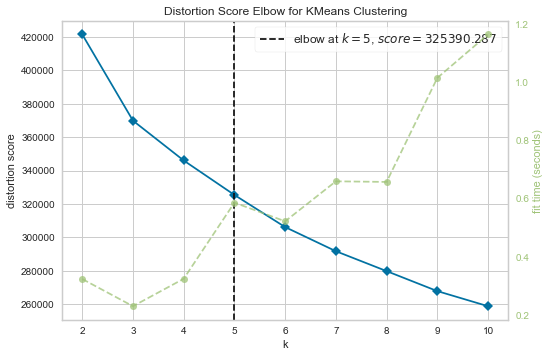

In [46]:
from yellowbrick.cluster import KElbowVisualizer

kmeans_elbow = KMeans(random_state=42)
visualizer_elbow = KElbowVisualizer(kmeans_elbow, k=(2,11), metric='distortion')
visualizer_elbow.fit(X_sample_norm)
k_opt = visualizer_elbow.elbow_value_
print(f'Optimal K: K={k_opt}')
visualizer_elbow.show()
None

Optimal K

In [47]:
kmeans = KMeans(n_clusters=k_opt, random_state=42).fit(X_scaled)

df_sample_half['cluster'] = kmeans.labels_

print(df_sample_half.groupby('cluster').size())

/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
0    402392
1    271009
2    357978
3     26372
4    453479
dtype: int64


PCA

In [48]:
# Reduce the dimensionality
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

pca.explained_variance_ratio_

array([0.19349391, 0.14287055])

In [49]:
pca.components_

array([[ 0.64346534,  0.04703384,  0.01809252,  0.00322672, -0.05950665,
         0.61139868,  0.45280968, -0.0318815 ],
       [ 0.00988821,  0.69565795, -0.70879767,  0.09954028,  0.03453179,
        -0.00374012, -0.04835524,  0.01073152]])

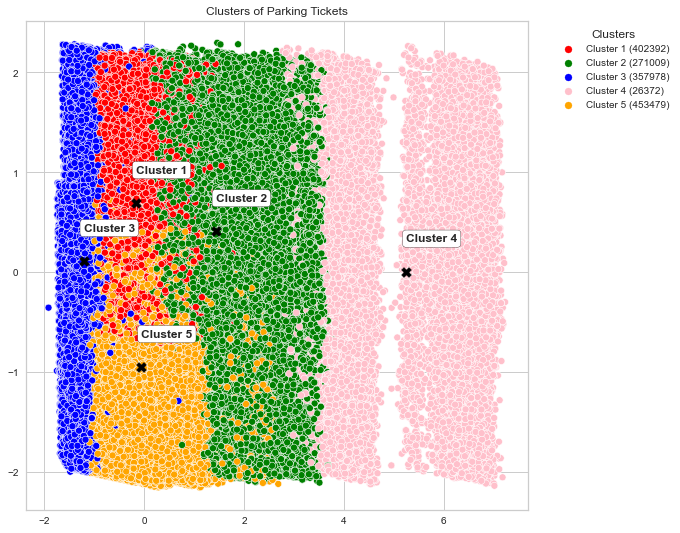

In [50]:
colors = ['red', 'green', 'blue', 'pink', 'orange']

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(9, 9)) 

ax = sns.scatterplot(x=X_pca[:, 0], 
                     y=X_pca[:, 1], 
                     hue=df_sample_half['cluster'], 
                     palette=colors)

# Clusters + centroids
counts = df_sample_half['cluster'].value_counts()
for i in range(len(counts)):
    centroid = [X_pca[df_sample_half['cluster'] == i, 0].mean(), 
                X_pca[df_sample_half['cluster'] == i, 1].mean()]
    ax.scatter(centroid[0], centroid[1], marker='X', s=100, c='black')
    ax.annotate(f'Cluster {i+1}', 
                xy=(centroid[0]+0.0, 
                    centroid[1]+0.30), 
                fontsize=12, 
                fontweight='bold',
                bbox=dict(facecolor='white', 
                          edgecolor='black', 
                          boxstyle='round'))
    
# Clusters count + legend
handles, labels = ax.get_legend_handles_labels()
labels_legend = [f'Cluster {i+1} ({counts[i]})' for i, label in enumerate(labels)]
ax.legend(handles, 
          labels_legend, 
          title='Clusters', 
          loc='upper right', 
          bbox_to_anchor=(1.30, 1))

plt.title('Clusters of Parking Tickets')
plt.show()

# **Analysis**


#### **Hour (time_hour)**

---

- Clusters 1, 2, and 3 have similar distributions with a peak around 13:00 (1 pm) and a spread between 10:00 (10 am) and 17:00 (5 pm). (It has a higher median hour value than the other clusters which indicates that tickets are more likely to occur during the later hours of the day.)
- Cluster 4 has a similar shape to clusters 1, 2, and 3 but with a slightly later peak at around 14:00 (2 pm). (It has a higher median minute value than the other clusters which indicates that tickets are more likely to occur during the later minutes of the hour.)
- Cluster 5 has a very different distribution with a peak at 02:00 (2 am) and a spread between 01:00 (1 am) and 04:00 (4 am).

It can be useful for understanding when it is more likely to receive a ticket:

- Clusters 1, 2, and 3 all have a similar distribution with a peak during the afternoon, which suggests that these clusters may represent areas with higher levels of daytime activity. 
- Cluster 5 has a very different distribution with a peak during the early morning hours, which may suggest that this cluster represents a different type of area, such as a nightlife district or an industrial area with overnight activity.

It would be even better in relation with location.

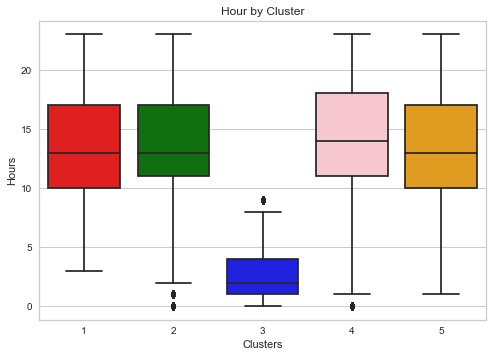

In [51]:
sns.boxplot(x='cluster', y='time_hour', data=df_sample_half, palette=colors)
plt.title('Hour by Cluster')
plt.ylabel('Hours')
plt.xlabel('Clusters')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.show()

In [52]:
hour_stats = df_sample_half.groupby('cluster')['time_hour'].describe()
print(hour_stats)

            count       mean       std  min   25%   50%   75%   max
cluster                                                            
0        402392.0  13.530843  4.318104  3.0  10.0  13.0  17.0  23.0
1        271009.0  13.579416  4.136262  0.0  11.0  13.0  17.0  23.0
2        357978.0   2.601350  1.865031  0.0   1.0   2.0   4.0   9.0
3         26372.0  13.642424  5.533027  0.0  11.0  14.0  18.0  23.0
4        453479.0  13.531623  4.168569  1.0  10.0  13.0  17.0  23.0


#### **Minutes (time_min)**

---

**Boxplots**
- Boxplots for minutes are similar across all clusters. It may indicate that the time of day when tickets are issued is not strongly related to the specific minute in the hour. 
- The hour of the day might be more important than the minutes for determining patterns in term of these parking tickets.

**Frequency distribution + Heatmap**

*Further analysis to try to find more details from the distribution*

The color within a cluster is similar across all minutes (even if each cluster has different red pigment). It suggests that frequency is evenly distributed throughout the hour of the cluster. That means and reinforces that a specific minute within the hour is not strongly related to receiving a ticket.

Heatmap results:

- Cluster 1 (darker red) has the highest frequency of tickets across all minutes.
- Cluster 2 (orange) still has moderate frequency, less than clusters 1, 3 and 5.
- Cluster 3 (medium red) has relavelity high frequency, not as strngly has Clusters 0.
- Cluster 4 (white) has very low frequency compared to others. The area might not be as strict as the others.
- Cluster 5 (lighter red) has more frequency than clusters 2 and 4 but less than clusters 1 and 3. 

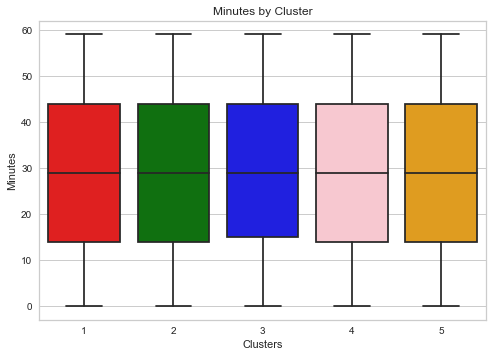

In [53]:
sns.boxplot(x='cluster', y='time_min', data=df_sample_half, palette=colors)
plt.title('Minutes by Cluster')
plt.ylabel('Minutes')
plt.xlabel('Clusters')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.show()

In [54]:
minute_stats = df_sample_half.groupby('cluster')['time_min'].describe()
print(minute_stats)

            count       mean        std  min   25%   50%   75%   max
cluster                                                             
0        402392.0  29.265957  17.211795  0.0  14.0  29.0  44.0  59.0
1        271009.0  29.151416  17.072164  0.0  14.0  29.0  44.0  59.0
2        357978.0  29.347829  17.175254  0.0  15.0  29.0  44.0  59.0
3         26372.0  29.123237  17.243930  0.0  14.0  29.0  44.0  59.0
4        453479.0  29.252364  17.168773  0.0  14.0  29.0  44.0  59.0


In [55]:
# Further analysis for minutes since they don't show any special pattern in the boxplot
# Frequency distribution to see number of tickets for each minutes of the hour
group_time_min = df_sample_half.groupby(['cluster', 'time_min']).size().reset_index(name='frequency')
group_time_min

,cluster,time_min,frequency
0,0,0,6839
1,0,1,6628
2,0,2,6557
3,0,3,6528
4,0,4,6559
...,...,...,...
295,4,55,7478
296,4,56,7117
297,4,57,7069
298,4,58,7099


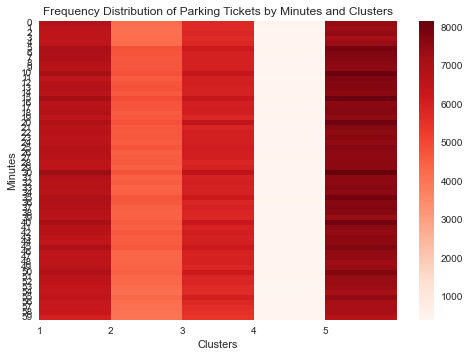

In [56]:
pivot_time_min = group_time_min.pivot(index='time_min', columns='cluster', values='frequency')

sns.heatmap(pivot_time_min, cmap='Reds', xticklabels=True, yticklabels=True)
plt.title('Frequency Distribution of Parking Tickets by Minutes and Clusters')
plt.xlabel('Clusters')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.ylabel('Minutes')
plt.show()

### **Hours (time_hour) & minutes (time_min)**

--- 

- Cluster 5 are more clear pattern than the others. The pattern is more related to 0 (midnightt) to 8 (am) hours. 
- For each cluster, tickest are gave throughout the hour. No significant pattern.


/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


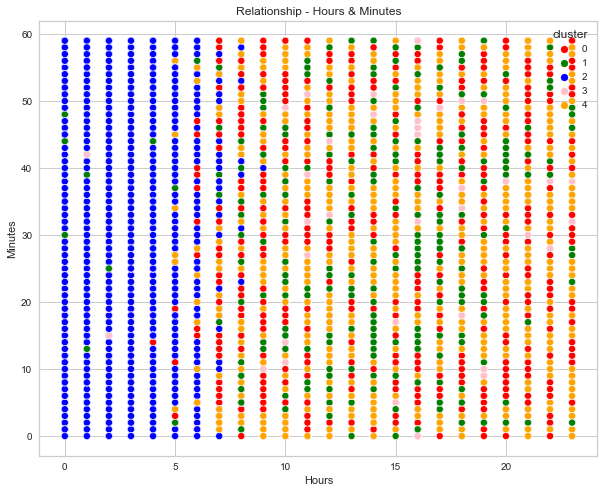

In [57]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='time_hour', y='time_min', hue='cluster', data=df_sample_half, palette=colors)
plt.title('Relationship - Hours & Minutes')
plt.xlabel('Hours')
plt.ylabel('Minutes')
plt.show()

#### **Fine Amount (set_fine_amount)**

---

- Cluster 1 and 3 have very similar distributions with median values around 30-50 and maximum values of 150
- Cluster 2 has a higher median value of 64 and a wider range of values with maximum value of 200. - Cluster 4 has a much higher median value of 362 and all the data points fall within the third quartile and no outliers are present. It seems to be an outlier in terms of the fine amount and contains only very high fine values. 
- Cluster 5 is much smaller in size and has a lower median value of 30 with a wider range of values and a lot of outliers.


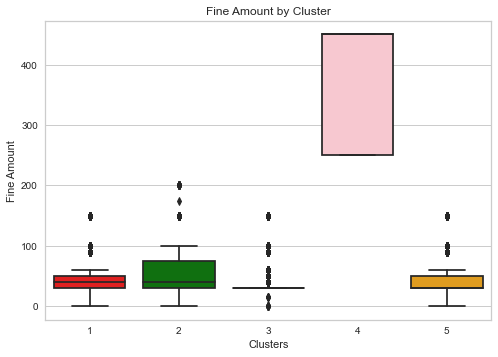

In [58]:
sns.boxplot(x='cluster', y='set_fine_amount', data=df_sample_half, palette=colors)
plt.title('Fine Amount by Cluster')
plt.ylabel('Fine Amount')
plt.xlabel('Clusters')
plt.xticks(ticks=[0,1,2,3,4], labels=[1,2,3,4,5])
plt.show()

In [59]:
amount_stats = df_sample_half.groupby('cluster')['set_fine_amount'].describe()
print(amount_stats)

            count        mean        std    min    25%    50%    75%    max
cluster                                                                    
0        402392.0   49.883062  27.717764    0.0   30.0   40.0   50.0  150.0
1        271009.0   64.158146  43.835408    0.0   30.0   40.0   75.0  200.0
2        357978.0   34.005679  13.899102    0.0   30.0   30.0   30.0  150.0
3         26372.0  360.287426  99.262385  250.0  250.0  450.0  450.0  450.0
4        453479.0   49.369739  30.120219    0.0   30.0   30.0   50.0  150.0


### **Hour (time_hour) + Fine amount (set_fine_amount)**

---

**Correlation**

Checking the correlation between hour and fine amount to see any relation.

- 0.167 is a weak positive correlation. 

**Scatter plot**

- Clusters 1, 2, 3 and 5 have lower fine amount than cluster 4.
- Cluster 4 has the highest fine amount throughout all hours of the day.
  - Fine amount are either around 250, 300 and 450.
- Cluster 1 and 3 have similarities in term of fine amount and hours. 
  - Fine amount are mostly between 0 and 100 and sometimes up to 150 or 200. 
  - Hours are between 5 am and 24 (midnight). 
- Cluster 2 is similarly spread throughout the hours/day which low fine amount, with some variation compares to clusters 1 and 3.
  - Fine amount mainly around 75 throughout the day with few variations around 50 and 150 and 200.

- Cluster 5 is only at the beginning of the day and below fine amount of 150.
  - Fine amount mainly between 0 and 100 with few 150.
  - Hours are only between 0 (midnight) and 8 am.


**Correlation (phi coefficient)**

- Phi coefficient: 246282
  - Strong positive relation between set_fine_amount and month.
  - It suggests that certain fine amounts tend to be associated with certain month.

- P-value: 0
  - 0 indicates the association between set_fine_amount and month is significant.

**Heat Map**

- Stronger positive relation between fine amount 30 at any time of the day, especially between 0 to 4 am and 8 am to 8 pm.

In [60]:
# Correlation
corr = df_sample_half['time_hour'].corr(df_sample_half['set_fine_amount'])
corr

0.16701577735701856

/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


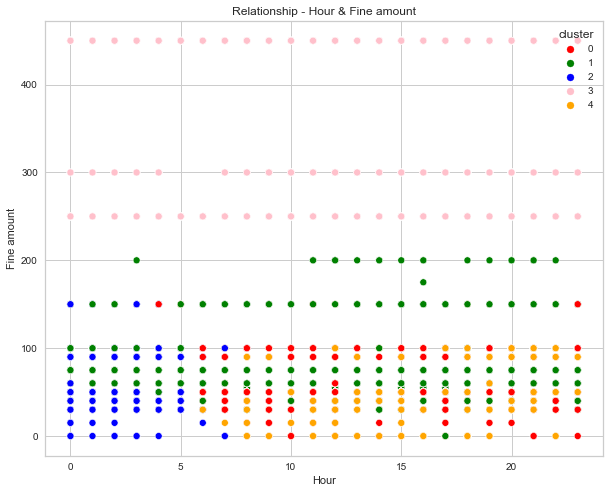

In [61]:
# Scatter plot
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='time_hour', y='set_fine_amount', hue='cluster', data=df_sample_half, palette=colors)
plt.title('Relationship - Hour & Fine amount')
plt.xlabel('Hour')
plt.ylabel('Fine amount')
plt.show()

In [62]:
# Correlation (phi coefficient)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_sample_half['set_fine_amount'], df_sample_half['time_hour'])
phi_coefficient, p_value, degee_freedom, expected_frequencies = chi2_contingency(contingency_table)
print("Phi coefficient: ", phi_coefficient)
print("p-value: ", p_value)

Phi coefficient:  248721.4656966786
p-value:  0.0


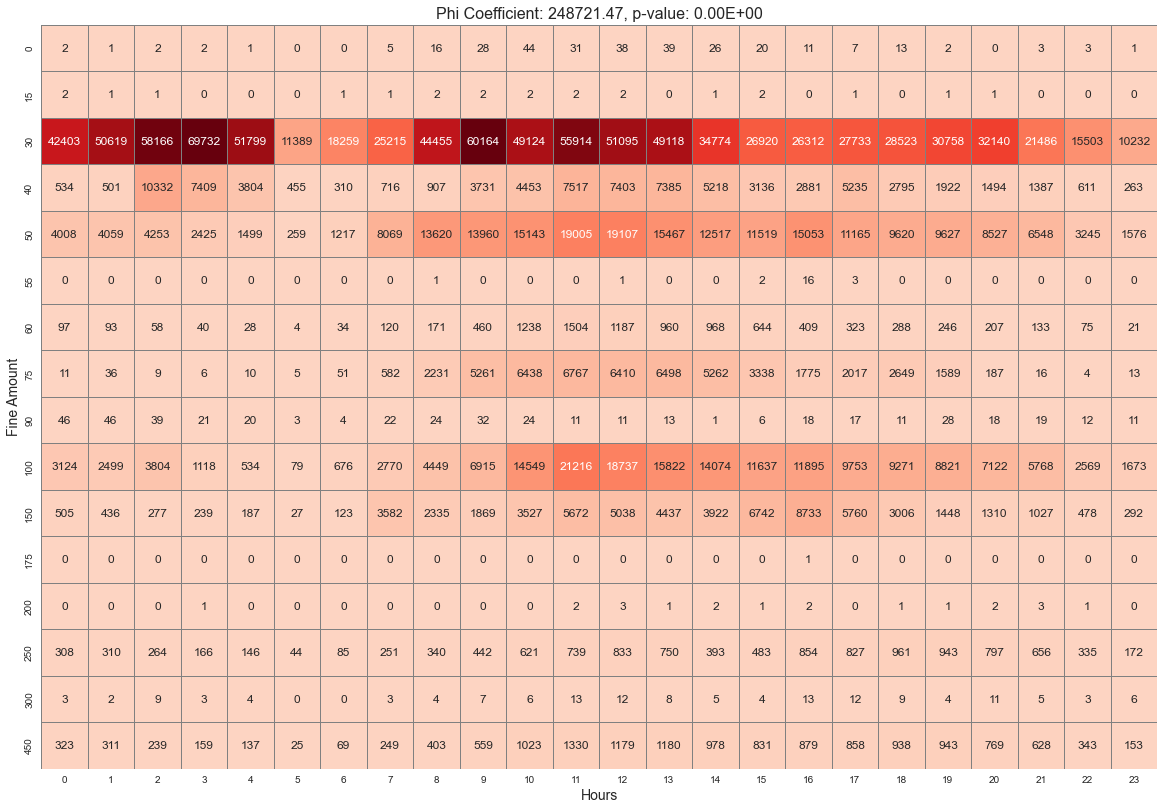

In [63]:
plt.subplots(figsize=(20, 15))
sns.heatmap(contingency_table, annot=True, cmap='Reds', cbar=False, square=True,
            linewidths=.5, linecolor='gray', fmt='g', annot_kws={"size": 12},
            vmin=0, vmax=contingency_table.sum().max() * 0.5, center=contingency_table.sum().max() * 0.2)
plt.xlabel("Hours", fontsize=14)
plt.ylabel("Fine Amount", fontsize=14)
plt.title(f"Phi Coefficient: {phi_coefficient:.2f}, p-value: {p_value:.2E}", fontsize=16)
plt.show()

#### **Year**

---

*We probably don't have enough years to be able to draw conclusions.*

- Cluster 1 is the highest of year 2021 and the lowest of year 2022.
- Cluster 2 is higher in year 2022 than 2021.
- Cluster 3 is the highest of year 2022 and the lowest of year 2021.
- Cluster 4 is similar throughout both year.
- Cluster 5 seems constant but higher in year 2022.


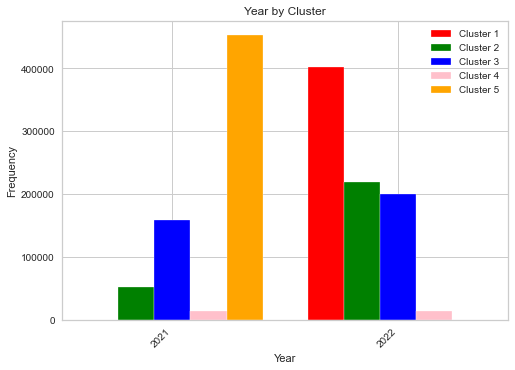

In [64]:
plt.hist([df_sample_half[df_sample_half['cluster'] == i]['year'] for i in range(len(kmeans.cluster_centers_))], 
         bins=2,
         range=(2020.5, 2022.5),
         label=[f'Cluster {i+1}' for i in range(len(kmeans.cluster_centers_))],
         color=colors)
plt.title('Year by Cluster')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.xticks([2021, 2022], rotation=45, ha='right')
plt.legend(loc='upper right')
plt.show()

#### **Month (January to December)**

---

- Cluster 1: Frequency is pretty high for each month troughout the year, but it seems higher between June and December.
- Cluster 2: Frequency is average for each month throughout the year, but it is slightly higher during March and between June and November. 
- Cluster 3: Frequency is higher than clusters 2, 3, 4 and 5 but less than cluster 1. It is pretty high for each month except January and February.
- Cluster 4: Seems to have the same low frequency throughout each month of the year.
- Cluster 5: Frequency is similar to Cluster 2 but it is above average for each month and throughout the year.

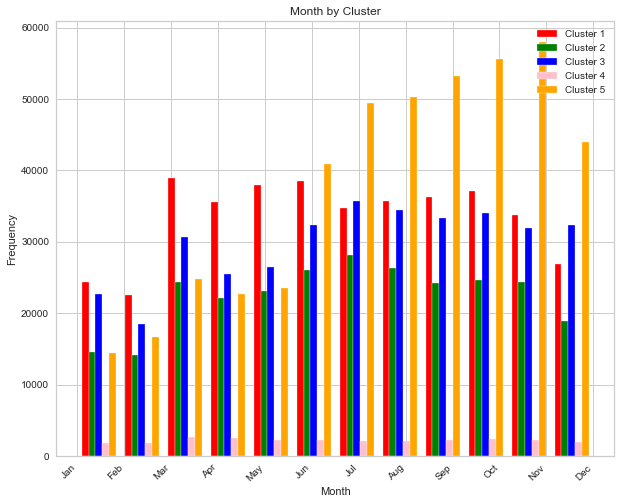

In [65]:
plt.subplots(figsize=(10, 8))
plt.hist([df_sample_half[df_sample_half['cluster'] == i]['month'] for i in range(len(kmeans.cluster_centers_))], 
         bins=12,
         label=[f'Cluster {i+1}' for i in range(len(kmeans.cluster_centers_))],
         color=colors)
plt.title('Month by Cluster')
plt.xlabel('Month')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### **Month (month) + Fine amount (set_fine_amount)**

---

**Correlation**

- -0.0258 is a weak negative correlation. 

**Correlation (phi coefficient)**

- Phi coefficient: 25597
  - Strong postitive relation between set_fine_amount and month.
  - It suggests that certain fine amounts tend to be associated with certain month.

- P-value: 0
  - 0 indicates the association between set_fine_amount and month is significant.

**Heat Map**

- Stronger positive relation between fine amount 30 at any month of the year.
- Medium positive relation for fine amount of 50 and 100.


In [66]:
# Correlation
corr = df_sample_half['month'].corr(df_sample_half['set_fine_amount'])
corr

-0.026197828605922006

In [67]:
# Correlation (phi coefficient)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_sample_half['set_fine_amount'], df_sample_half['month'])
phi_coefficient, p_value, degee_freedom, expected_frequencies = chi2_contingency(contingency_table)
print("Phi coefficient: ", phi_coefficient)
print("p-value: ", p_value)

Phi coefficient:  26304.993451567425
p-value:  0.0


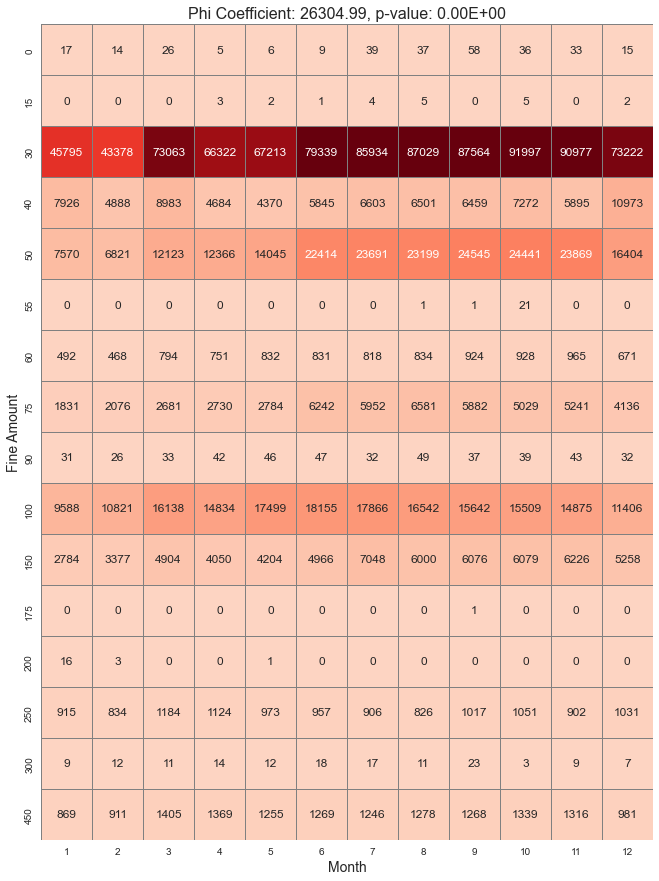

In [68]:
plt.subplots(figsize=(20, 15))
sns.heatmap(contingency_table, annot=True, cmap='Reds', cbar=False, square=True,
            linewidths=.5, linecolor='gray', fmt='g', annot_kws={"size": 12},
            vmin=0, vmax=contingency_table.sum().max() * 0.5, center=contingency_table.sum().max() * 0.2)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Fine Amount", fontsize=14)
plt.title(f"Phi Coefficient: {phi_coefficient:.2f}, p-value: {p_value:.2E}", fontsize=16)
plt.show()

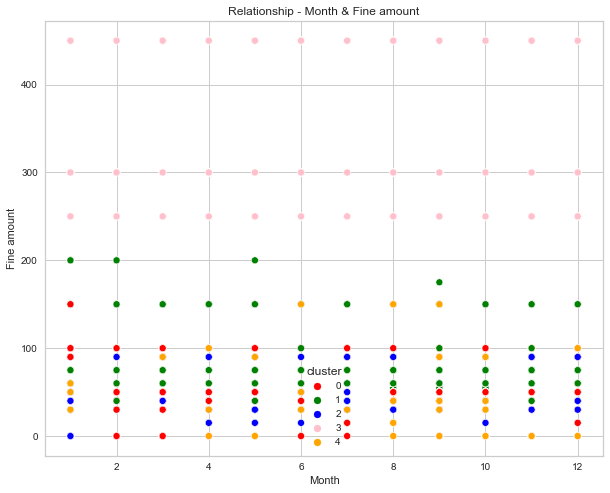

In [69]:
# Scatter plot
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='month', y='set_fine_amount', hue='cluster', data=df_sample_half, palette=colors)
plt.title('Relationship - Month & Fine amount')
plt.xlabel('Month')
plt.ylabel('Fine amount')
plt.show()

#### **Day (1 to 29/30/31)**

---

- Cluster 1, 2, 3 and 5 are constant throughout the month. Cluster 1 always being the highest of these three, followed by cluster 3, cluster 5 and cluster 2. They are slightly higher at the end of the month.
- Cluster 4: Seems to have the same low frequency throughout each day of the month.

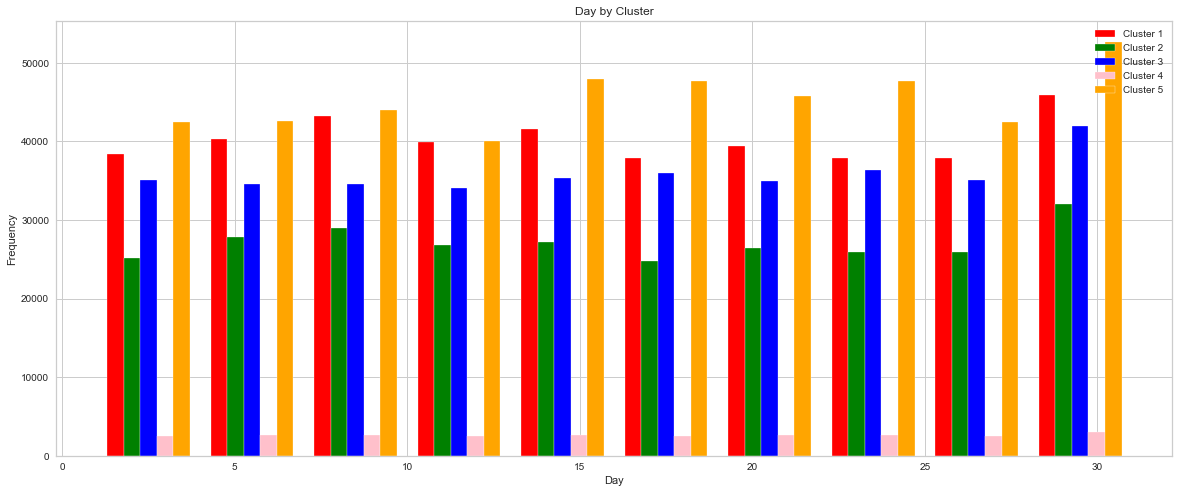

In [70]:
plt.subplots(figsize=(20, 8))
plt.hist([df_sample_half[df_sample_half['cluster'] == i]['day'] for i in range(len(kmeans.cluster_centers_))], 
         label=[f'Cluster {i+1}' for i in range(len(kmeans.cluster_centers_))],
         color=colors)
plt.title('Day by Cluster')
plt.xlabel('Day')
days= [str(num) for num in range(1, 32)]
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### **Day (day) + Fine amount (set_fine_amount)**

---

**Correlation**

- -0.0004 is a weak negative correlation. 

**Correlation (phi coefficient)**

- Phi coefficient: 4687
  - Strong postitive relation between set_fine_amount and day.
  - It suggests that certain fine amounts tend to be associated with certain day.

- P-value: 0
  - 0 indicates the association between set_fine_amount and day is significant.

**Heat Map**

- Stronger positive relation for fine amount 30 at any day of the month.
- Medium positive reltion for fine amount of 50 and 100.


In [71]:
# Correlation
corr = df_sample_half['day'].corr(df_sample_half['set_fine_amount'])
corr

-0.0009285666838381244

In [72]:
# Correlation (phi coefficient)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_sample_half['set_fine_amount'], df_sample_half['day'])
phi_coefficient, p_value, degee_freedom, expected_frequencies = chi2_contingency(contingency_table)
print("Phi coefficient: ", phi_coefficient)
print("p-value: ", p_value)

Phi coefficient:  4936.034731426369
p-value:  0.0


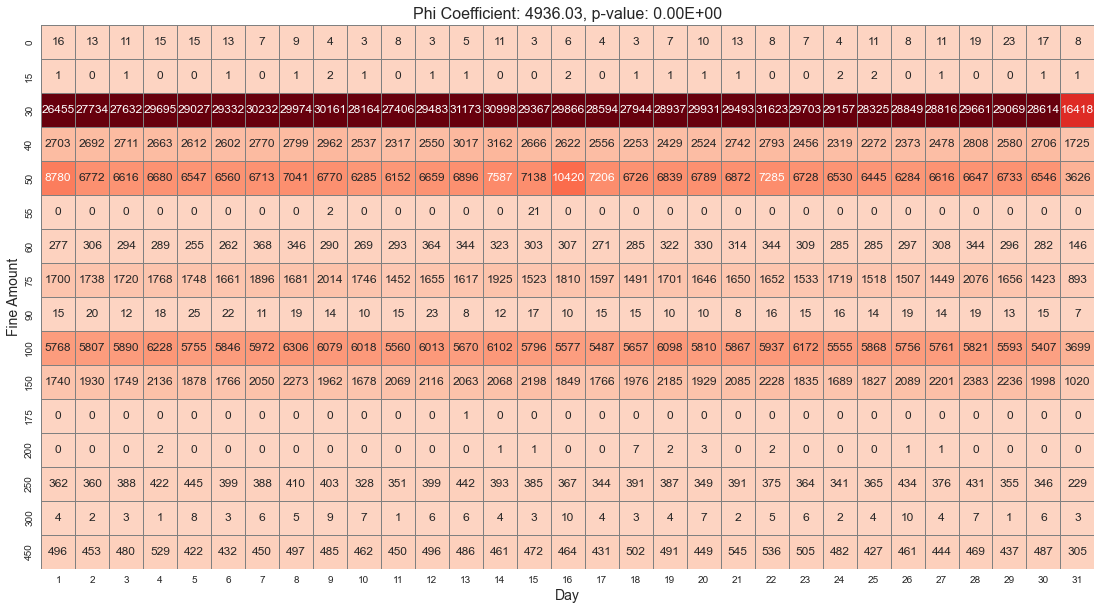

In [73]:
plt.subplots(figsize=(40, 10))
sns.heatmap(contingency_table, annot=True, cmap='Reds', cbar=False, square=True,
            linewidths=.5, linecolor='gray', fmt='g', annot_kws={"size": 12},
            vmin=0, vmax=contingency_table.sum().max() * 0.5, center=contingency_table.sum().max() * 0.2)
plt.xlabel("Day", fontsize=14) 
plt.ylabel("Fine Amount", fontsize=14)
plt.title(f"Phi Coefficient: {phi_coefficient:.2f}, p-value: {p_value:.2E}", fontsize=16)
plt.show()

#### **Day of week**

---

- Cluster 1, 2 and 3 are higher on the weekday than the weekend. They increase from Monday to Wednesday and decrease from Wednesday to Sunday. Thursday and Friday are pretty similar.
- Cluster 4: Seems to have the same low frequency throughout each day of the week.
- Cluster 5: Frequency is increasing as the week go (Monday to Sunday). It is increasing on the weekend compared to other clusters that decrease on the weekend (except for cluster 4 that is the same for every day). 

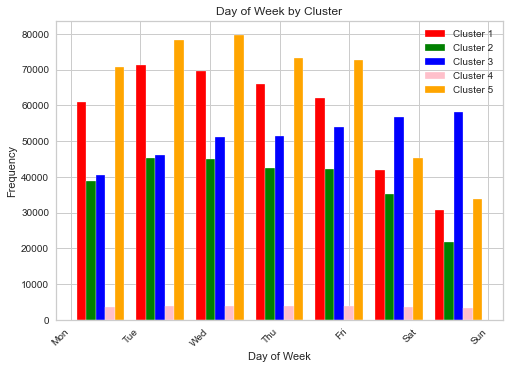

In [74]:
plt.hist([df_sample_half[df_sample_half['cluster'] == i]['day_of_week'] for i in range(len(kmeans.cluster_centers_))], 
         bins=7,
         label=[f'Cluster {i+1}' for i in range(len(kmeans.cluster_centers_))],
         color=colors)
plt.title('Day of Week by Cluster')
plt.xlabel('Day of Week')
plt.xticks(range(0,7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45, ha='right')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

### **Day of week (day_of_week) + Fine amount (set_fine_amount)**

---

**Correlation (linear)**

- -0.0147 is a weak negative correlation. 


*It is maybe not a linear correlation so we try another correlation tool:*

**Correlation (phi coefficient)**

- Phi coefficient: 12080.36989562692
  - Strong postitive relation between set_fine_amount and day_of_week.
  - It suggests that certain fine amounts tend to be associated with certain days of the week.

- P-value: 0
  - 0 indicates the association between set_fine_amount and day_of_week is significant.

**Heat Map**

- Stronger positive relation for fine amount 30 at any day of the week.
- Medium positive relation for fine amount of 50 and 100.

In [75]:
# Correlation (linear)
corr = df_sample_half['day_of_week'].corr(df_sample_half['set_fine_amount'])
corr

-0.013829809755494766

In [76]:
# Correlation (phi coefficient)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_sample_half['set_fine_amount'], df_sample_half['day_of_week'])
phi_coefficient, p_value, degee_freedom, expected_frequencies = chi2_contingency(contingency_table)
print("Phi coefficient: ", phi_coefficient)
print("p-value: ", p_value)

Phi coefficient:  12099.710430455067
p-value:  0.0


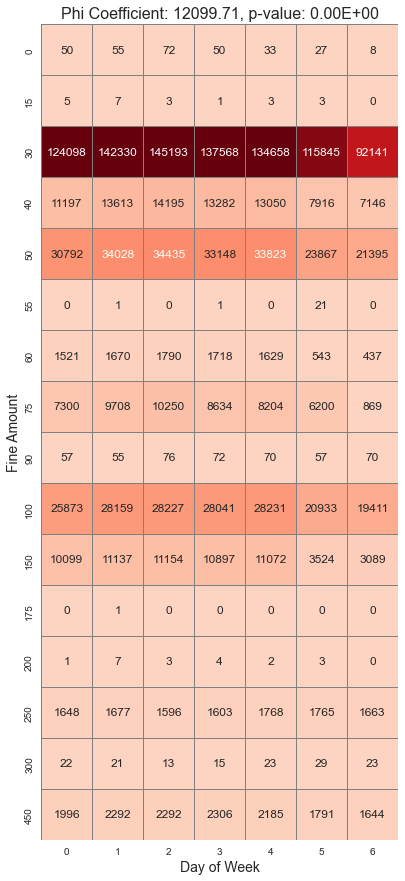

In [77]:
plt.subplots(figsize=(8, 15))
sns.heatmap(contingency_table, annot=True, cmap='Reds', cbar=False, square=True,
            linewidths=.5, linecolor='gray', fmt='g', annot_kws={"size": 12},
            vmin=0, vmax=contingency_table.sum().max() * 0.5, center=contingency_table.sum().max() * 0.2)
plt.xlabel("Day of Week", fontsize=14)
plt.ylabel("Fine Amount", fontsize=14)
plt.title(f"Phi Coefficient: {phi_coefficient:.2f}, p-value: {p_value:.2E}", fontsize=16)
plt.show()

#### **Infraction Code** (if needed)

---


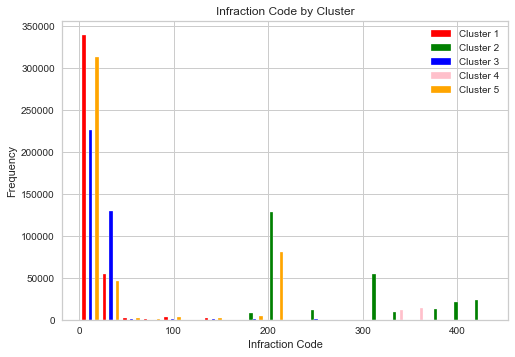

In [78]:
plt.hist([df_sample_half[df_sample_half['cluster'] == i]['infraction_code'] for i in range(len(kmeans.cluster_centers_))], 
         bins=20, 
         label=[f'Cluster {i+1}' for i in range(len(kmeans.cluster_centers_))],
         color=colors)
plt.title('Infraction Code by Cluster')
plt.xlabel('Infraction Code')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

In [79]:
# Correlation
corr = df_sample_half['infraction_code'].corr(df_sample_half['set_fine_amount'])
corr

0.40384653732572673

In [80]:
# Correlation (phi coefficient)
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_sample_half['set_fine_amount'], df_sample_half['infraction_code'])
phi_coefficient, p_value, degee_freedom, expected_frequencies = chi2_contingency(contingency_table)
print("Phi coefficient: ", phi_coefficient)
print("p-value: ", p_value)

Phi coefficient:  21455013.13744746
p-value:  0.0


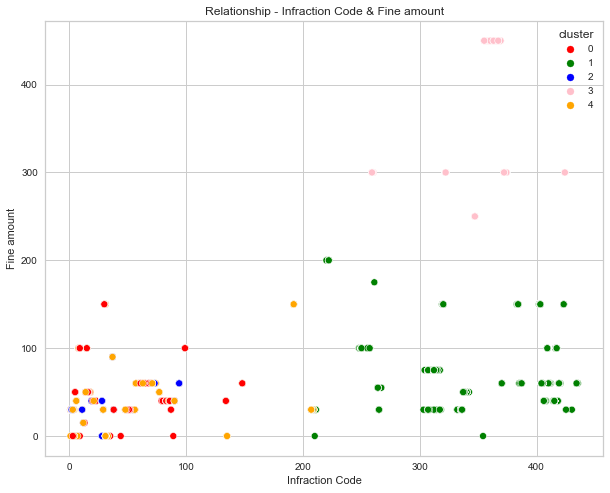

In [81]:
plt.subplots(figsize=(10, 8))
sns.scatterplot(x='infraction_code', y='set_fine_amount', hue='cluster', data=df_sample_half, palette=colors)
plt.title('Relationship - Infraction Code & Fine amount')
plt.xlabel('Infraction Code')
plt.ylabel('Fine amount')
plt.show()

Regression Analysis

In [82]:
#extract street name from street address
df_con['street_name'] = df_con['location2'].str.extractall(r"([A-Z]+)").groupby(level=0).sum(numeric_only=False)

In [83]:
#extract day_of_year, day_of_week, and year from date
df_con["date_of_infraction"] = pd.to_datetime(df_con["date_of_infraction"], format='%Y%m%d')

df_con['day_of_year'] = df_con['date_of_infraction'].dt.dayofyear
df_con['day_of_week'] = df_con['date_of_infraction'].dt.dayofweek
df_con['year'] = df_con['date_of_infraction'].dt.year

In [84]:
print(df_con.head())

  tag_number_masked date_of_infraction  infraction_code  \
0          ***92621         2021-01-01                3   
1          ***42843         2021-01-01                3   
2          ***47171         2021-01-01                3   
3          ***42844         2021-01-01                3   
4          ***42848         2021-01-01                3   

     infraction_description  set_fine_amount time_of_infraction location1  \
0  PARK ON PRIVATE PROPERTY               30               0013        AT   
1  PARK ON PRIVATE PROPERTY               30               0026       NaN   
2  PARK ON PRIVATE PROPERTY               30               0029       NaN   
3  PARK ON PRIVATE PROPERTY               30               0029       NaN   
4  PARK ON PRIVATE PROPERTY               30               0040       NaN   

             location2 location3 location4 province  year  month  day  \
0  1440 LAWRENCE AVE W       NaN       NaN       ON  2021      1    1   
1        33 GABIAN WAY       NaN    

In [85]:
# select columns that we are interested in  
df_init = df_con.filter(['street_name','day_of_year', 'day_of_week', 'year'], axis=1)

In [86]:
grouper = df_init.groupby(['year'])
df_year = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_year

,year,count
0,2021,1480724
1,2022,1820822


In [87]:
# There are less tickets in 2021 which it can be due to restriction for Covid-19 

In [88]:
grouper = df_init.groupby(['day_of_week'])
df_week = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_week

,day_of_week,count
0,0,466030
1,1,532587
2,2,542186
3,3,517191
4,4,512482
5,5,403275
6,6,327795


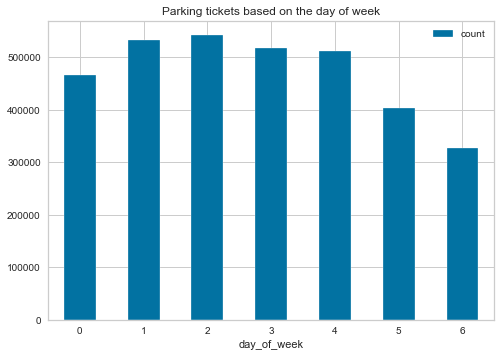

In [89]:
ax = df_week.plot.bar(x='day_of_week', title='Parking tickets based on the day of week', rot=0)

In [90]:
# There are less tickets on weekends, minimum on Sunday and maximum on Wednesday

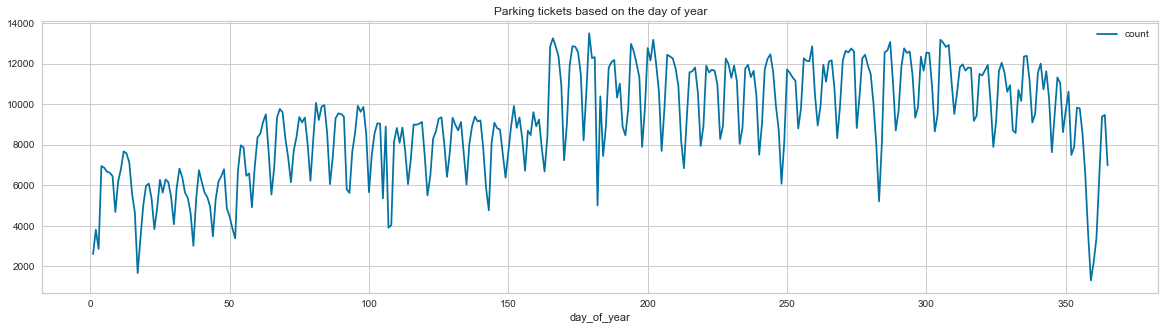

In [91]:
grouper = df_init.groupby(['day_of_year'])
df_day_of_year = grouper['street_name'].count().to_frame(name = 'count').reset_index()

ax = df_day_of_year.plot(figsize=(20, 5), x='day_of_year', title='Parking tickets based on the day of year', rot=0)


In [92]:
grouper = df_init.groupby(['street_name'])
df_street = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_street

,street_name,count
0,AAACOXWELLAVE,1
1,AAAKNIGHTST,2
2,AAAMAINST,1
3,AAAMORTIMERAVE,2
4,AABERDEENAVE,1
...,...,...
16493,ZEZELWAY,116
16494,ZHOWARDST,1
16495,ZHUNTLEYST,3
16496,ZLINDENST,2


In [93]:
# number of streets with less than 1000 tickets
df_street_sub1 = df_street[df_street['count'] <= 5000]
df_street_sub1.shape

(16379, 2)

In [94]:
# there are a lot of steert that some have very few and some have a lot of tickets issued so we categorize them by
# number of tickets issued into three categoris, low, medium, and high

In [95]:
# number of streets with tickets between 5000 and 10000
df_street_sub2 = df_street[(df_street['count'] > 5000) & (df_street['count'] <= 20000)]
df_street_sub2.shape

(105, 2)

In [96]:
# number of streets with tickets more than 10000
df_street_sub3 = df_street[(df_street['count'] > 20000)]
df_street_sub3.shape

(14, 2)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


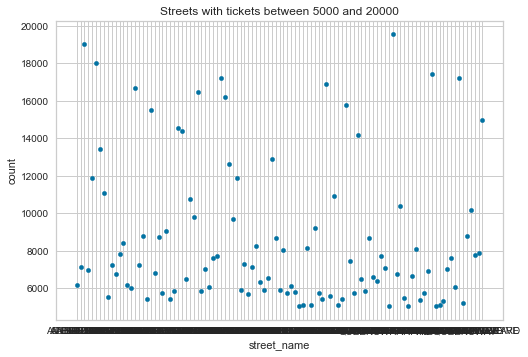

In [97]:
df_street_sub2.plot(kind = 'scatter', x = 'street_name', y = 'count', title='Streets with tickets between 5000 and 20000')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


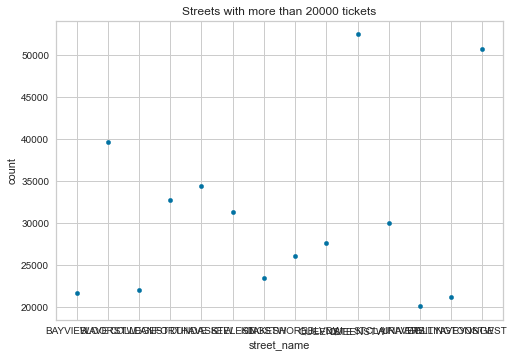

In [98]:
df_street_sub3.plot(kind = 'scatter', x = 'street_name', y = 'count', title='Streets with more than 20000 tickets')
plt.show()

In [99]:
# streets with maximum number of tickets
print(df_street_sub3.sort_values(by=['count'], ascending=False))

          street_name  count
12347        QUEENSTW  52406
16404         YONGEST  50676
2164         BLOORSTW  39619
4861        DUNDASSTW  34349
4200      DANFORTHAVE  32669
8200          KEELEST  31316
14135     STCLAIRAVEW  30014
12340        QUEENSTE  27567
8677   LAKESHOREBLVDW  26065
8463          KINGSTW  23418
3700        COLLEGEST  22010
1587       BAYVIEWAVE  21628
15689   WELLINGTONSTW  21169
15222   UNIVERSITYAVE  20064


In [100]:
print ('Average number of tickets issued per day for first category: ', df_street_sub1['count'].mean()/730)
print ('Average number of tickets issued per day for second category: ', df_street_sub2['count'].mean()/730)
print ('Average number of tickets issued per day for third category: ', df_street_sub3['count'].mean()/730)

Average number of tickets issued per day for first category:  0.16400837356889503
Average number of tickets issued per day for second category:  11.840600130463145
Average number of tickets issued per day for third category:  42.36497064579257


In [101]:
np.random.seed(123)

In [102]:
grouper = df_init.groupby(['street_name', 'year', 'day_of_year', 'day_of_week'])
df_process = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_process

,street_name,year,day_of_year,day_of_week,count
0,AAACOXWELLAVE,2021,267,4,1
1,AAAKNIGHTST,2021,267,4,2
2,AAAMAINST,2021,267,4,1
3,AAAMORTIMERAVE,2021,267,4,2
4,AABERDEENAVE,2021,242,0,1
...,...,...,...,...,...
666005,ZORRAST,2022,356,3,19
666006,ZORRAST,2022,357,4,15
666007,ZORRAST,2022,360,0,20
666008,ZORRAST,2022,364,4,2


In [103]:
df_process.corr()

,year,day_of_year,day_of_week,count
year,1.000000,-0.120977,0.010422,0.024445
day_of_year,-0.120977,1.000000,-0.000804,0.034707
day_of_week,0.010422,-0.000804,1.000000,-0.007827
count,0.024445,0.034707,-0.007827,1.000000


In [104]:
df_process.street_name.nunique()

16498

In [105]:
# because there are alot of streets so we don't use One Hot encoder, instead we use label encoder 
df_process['street_name'] = df_process['street_name'].astype('category')  
df_process['street_code'] = df_process['street_name'].cat.codes  

df_process.head()

features = ['street_code', 'day_of_week', 'day_of_year', 'year']
target = ['count']


In [106]:
X = df_process[features]
y = df_process[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Linear Regression

In [107]:
std_scaler = StandardScaler()
lin_reg = LinearRegression()
lin_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])
res = lin_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 


RMSE:  8.33919553957878
R-square train:  0.0021023828289910007
R-square test:  0.0020901789194737175


In [108]:
# r-squared is zero which means the model doesn't perform beter than a mean value so we have reconsider
# our approach

# Reconsider input data

In [109]:
# first approach, look into streets with highest rate of tickets
df_process_sub3 = df_process[df_process['street_name'].isin(df_street_sub3['street_name'])]

X = df_process_sub3[features]
y = df_process_sub3[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [110]:
# linear regression
std_scaler = StandardScaler()
lin_reg = LinearRegression()
lin_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])
res = lin_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('Model: Linear Regression')
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 

Model: Linear Regression
RMSE:  30.509351096055976
R-square train:  0.16858755015044935
R-square test:  0.1704654391082594


Text(0, 0.5, 'RMSE')

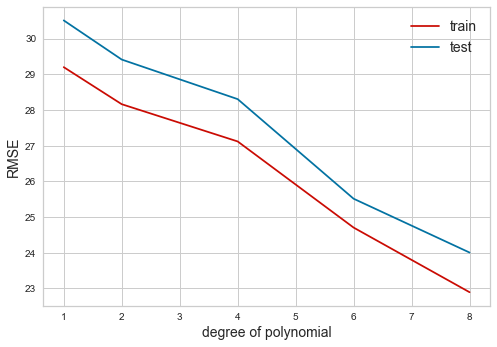

In [111]:
# polynomial regression
poly_degrees = [1, 2, 4, 6, 8]

train_errors, test_errors = [], []

for i in poly_degrees:
    poly_features = PolynomialFeatures(degree = i)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_train_pred = poly_regression.predict(X_train)
    y_test_pred = poly_regression.predict(X_test)
    train_errors.append(math.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_errors.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
    
plt.plot(poly_degrees, train_errors, "r-+", label="train")
plt.plot(poly_degrees, test_errors, "b-", label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("degree of polynomial", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [112]:
# best result is for degree 8 
poly_features = PolynomialFeatures(degree = 8)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
poly_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])
res = poly_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('Model: Polynomial Regression with degree 8')
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 
print('')

Model: Polynomial Regression with degree 8
RMSE:  24.004829669490352
R-square train:  0.48892504745862597
R-square test:  0.4864700225809572



In [113]:
# SGD regression

std_scaler = StandardScaler()
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1)
sgd_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("sgd_reg", sgd_reg)
])
res = sgd_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('Model: SGD')
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 

Model: SGD
RMSE:  30.680164104061166
R-square train:  0.15823756060604133
R-square test:  0.16115079006384536


/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [114]:
# second approach, use the model for each street, here we implement for the street with highest ticket
# street with highest number of tickets is QUEENSTW

code_num = df_process[df_process.street_name == 'QUEENSTW'].iloc[0]['street_code']

df_process_street = df_process[df_process.street_code == code_num]

X = df_process_street[features]
y = df_process_street[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Linear Regression

std_scaler = StandardScaler()
lin_reg = LinearRegression()
lin_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])
res = lin_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('Model: Linear Regression')
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 

Model: Linear Regression
RMSE:  37.446745811641286
R-square train:  0.49601329400881133
R-square test:  0.3687029655175589


Text(0, 0.5, 'RMSE')

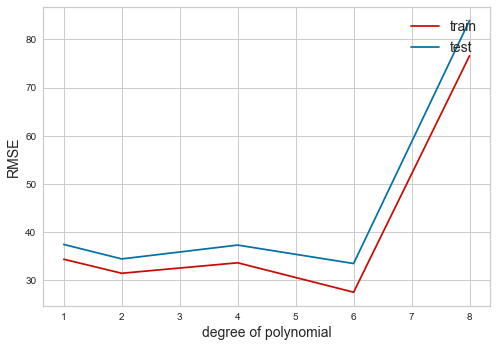

In [115]:
poly_degrees = [1, 2, 4, 6, 8]

train_errors, test_errors = [], []

for i in poly_degrees:
    poly_features = PolynomialFeatures(degree = i)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_train_pred = poly_regression.predict(X_train)
    y_test_pred = poly_regression.predict(X_test)
    train_errors.append(math.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_errors.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
    
plt.plot(poly_degrees, train_errors, "r-+", label="train")
plt.plot(poly_degrees, test_errors, "b-", label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("degree of polynomial", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [116]:
poly_features = PolynomialFeatures(degree = 6)
std_scaler = StandardScaler()
lin_reg = LinearRegression()
poly_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])
res = poly_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('Model: Polynomial Regression with degree 6')
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 
print('')

Model: Polynomial Regression with degree 6
RMSE:  33.48979562468086
R-square train:  0.6766262389642712
R-square test:  0.49507069349368193



In [117]:
std_scaler = StandardScaler()
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1)
sgd_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("sgd_reg", sgd_reg)
])
res = sgd_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('Model: SGD')
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 


Model: SGD
RMSE:  38.29471994776205
R-square train:  0.4908177032833497
R-square test:  0.33978805215783947


/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
# In both approaches, we got the best result with polynomial regression model